In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

In [25]:
# load the dataset
file = pd.read_csv("/content/drive/MyDrive/NTCC/Fashion/Amazon_Fashion.csv")
file.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,1578528394489,3,True
1,5.0,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1608426246701,0,True
2,2.0,Two Stars,One of the stones fell out within the first 2 ...,[],B007ZSEQ4Q,B007ZSEQ4Q,AHITBJSS7KYUBVZPX7M2WJCOIVKQ,1432344828000,3,True
3,1.0,Won’t buy again,Crappy socks. Money wasted. Bought to wear wit...,[],B07F2BTFS9,B07F2BTFS9,AFVNEEPDEIH5SPUN5BWC6NKL3WNQ,1546289847095,2,True
4,5.0,I LOVE these glasses,I LOVE these glasses! They fit perfectly over...,[],B00PKRFU4O,B00XESJTDE,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1439476166000,0,True


In [5]:
file.shape #check the shape of the dataset

(2500939, 10)

In [6]:
file.info() # Get an overview of the dataset's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500939 entries, 0 to 2500938
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 174.1+ MB


Data cleaning

In [7]:
file.isnull().sum()  # Count the number of null values in each column
new = file.dropna(subset=['text'])  # Remove rows with null 'text' entries
new.shape  # Check the new shape after cleaning

(2499845, 10)

In [8]:
# Perform simple random sampling
new_sample = new.sample(n=10000, random_state=42)
new_sample.shape  # Verify the shape of the sampled dataset
new_sample.info()  # Get an overview of the sampled dataset's information

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1746467 to 374369
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             10000 non-null  float64
 1   title              9998 non-null   object 
 2   text               10000 non-null  object 
 3   images             10000 non-null  object 
 4   asin               10000 non-null  object 
 5   parent_asin        10000 non-null  object 
 6   user_id            10000 non-null  object 
 7   timestamp          10000 non-null  int64  
 8   helpful_vote       10000 non-null  int64  
 9   verified_purchase  10000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 791.0+ KB


In [9]:
file.isnull().sum()

rating                  0
title                 576
text                 1094
images                  0
asin                    0
parent_asin             0
user_id                 0
timestamp               0
helpful_vote            0
verified_purchase       0
dtype: int64

There are 1094 rows are null in the 'text' column. Lets eliminate it.

In [10]:
new = file.dropna(subset=['text'])
new.shape
# new.isnull().sum()

(2499845, 10)

We have 2.4 million dataset. We will use 10000 of dataset for the project purpose. For achieving this let's perform simple random sampling.

In [11]:
new_sample = new.sample(n=10000, random_state=42)
new_sample.shape

(10000, 10)

In [12]:
new_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1746467 to 374369
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             10000 non-null  float64
 1   title              9998 non-null   object 
 2   text               10000 non-null  object 
 3   images             10000 non-null  object 
 4   asin               10000 non-null  object 
 5   parent_asin        10000 non-null  object 
 6   user_id            10000 non-null  object 
 7   timestamp          10000 non-null  int64  
 8   helpful_vote       10000 non-null  int64  
 9   verified_purchase  10000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 791.0+ KB


## Preprocess numerical data graphically

To perform the further analysis on amazon fashion reviews let first do exploratory data analysis on 'rating' column.

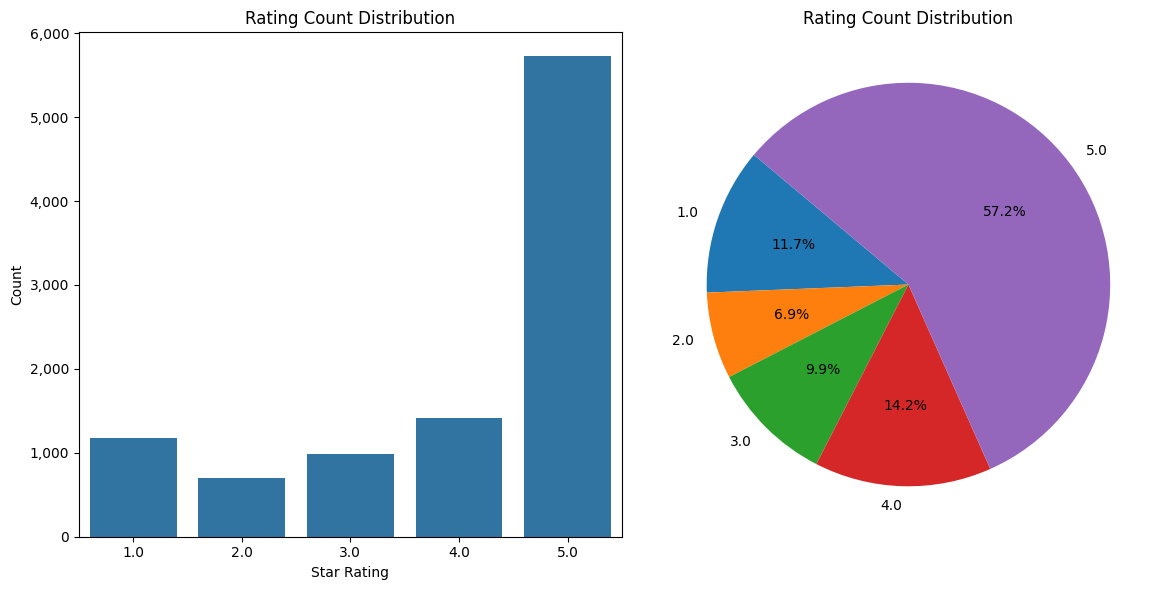

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count ratings
rating_counts = new_sample.rating.value_counts().sort_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=ax1)
ax1.set_xlabel('Star Rating')
ax1.set_ylabel('Count')
ax1.set_title('Rating Count Distribution')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Pie chart
ax2.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Rating Count Distribution')

plt.tight_layout()
plt.show()

In [14]:
rating_counts = new_sample.rating.value_counts().sort_index()
rating_counts

rating
1.0    1175
2.0     694
3.0     988
4.0    1419
5.0    5724
Name: count, dtype: int64

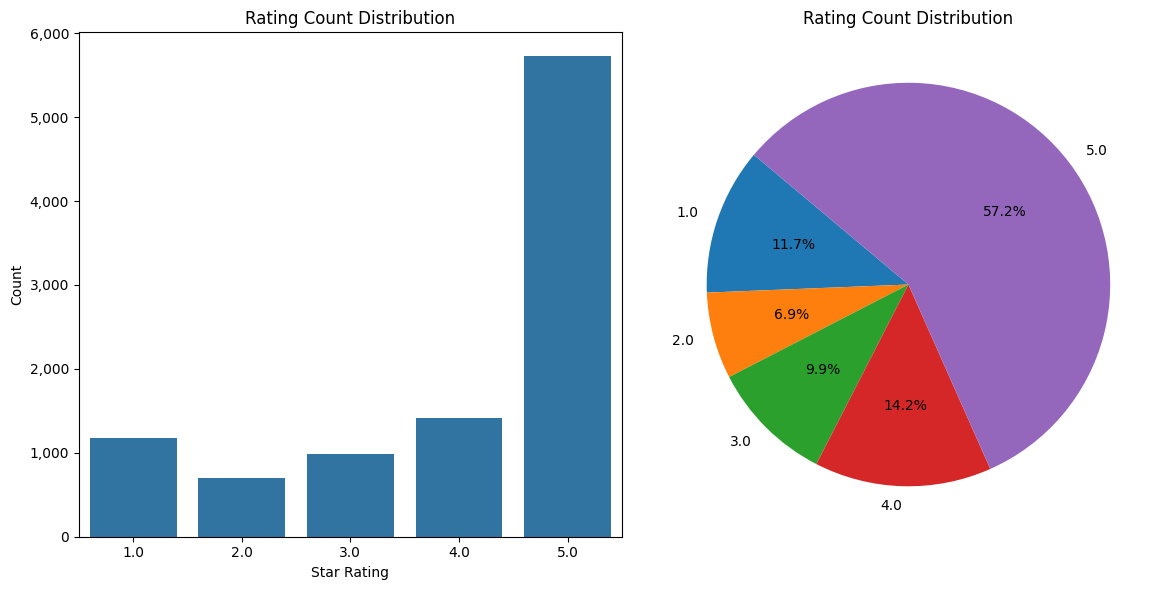

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plt.show()
# Bar plot
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=ax1)
ax1.set_xlabel('Star Rating')
ax1.set_ylabel('Count')
ax1.set_title('Rating Count Distribution')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Pie chart
ax2.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Rating Count Distribution')

plt.tight_layout()
plt.show()

Around 57.2% rating is 5 star, which overall shows customer satisfaction towards positivity.

# Preprocess Text data using Sentimental Analysis technique.



In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
# eg =  new_sample['text'][0:1:]

# ex = eg.iloc[0]
# type(ex)
new_sample = new_sample.assign(Id=range(1, len(new_sample) + 1))

# Display the first few rows
new_sample.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Id
1746467,5.0,Sexy,Really cute and attractive and fit perfect ord...,[],B071Z9F2XL,B071Z9F2XL,AEA5JYGGF6JDITNFQFOP4IX5PD2Q,1559389545852,0,True,1
1914537,5.0,How it fit,Thought they were leggings but I still like th...,[],B097BNVGF9,B097BMDMKB,AFTVWCNSEGCJ47WI5LQ74KTDFBVQ,1680285413056,0,True,2
371212,3.0,Runs Small,It was too small. I Ordered a size up and it ...,[],B07CVYV2D3,B07CVYV2D3,AFFPDHTJPDT7ZK5V46WDHJEHH7EQ,1563754552074,0,True,3
1762113,4.0,Comfy but a little short,Very comfy pant but a little short for my son.,[],B07Q58KZ66,B07Q58KZ66,AG7GPSDG747TL7ZDYP5CN6ZM2T2A,1582556487336,0,True,4
844125,5.0,GREAT LOOK AND GREAT BUY!!!!,"For the price, I was astounded by these earrin...",[],B01MSR7IQB,B01MSR7IQB,AFJYR62YXUOE72BZIU6TH2VNU6PA,1497280111336,0,True,5


In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')         # WordNet corpus for lemmatization
nltk.download('vader_lexicon')   # VADER sentiment lexicon for sentiment analysis
nltk.download('words')           # Word list corpus
nltk.download('stopwords')       # Stop words corpus

# Text cleaning function
def clean_text(text):
    text = text.lower()                          # Lowercase the text
    text = re.sub(r'[^\w\s]', '', text)          #Remove punctuation
    text = re.sub(r'\d+', '', text)              #Remove numbers
    tokens = word_tokenize(text)                 #Tokenize the text
    stop_words = set(stopwords.words('english')) #Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()             #Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)                      #Join tokens back into a string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def clean_text(text):
    # Step 1: Lowercase the text
    text = text.lower()

    # Step 2: Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Remove numbers
    text = re.sub(r'\d+', '', text)

    # Step 4: Tokenize the text
    tokens = word_tokenize(text)

    # Step 5: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 6: Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    return ' '.join(tokens)

# clean_text(ex)

**1. Initilize VADER Sentiment Analyzer**

In [21]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [22]:
new_sample.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Id
1746467,5.0,Sexy,Really cute and attractive and fit perfect ord...,[],B071Z9F2XL,B071Z9F2XL,AEA5JYGGF6JDITNFQFOP4IX5PD2Q,1559389545852,0,True,1
1914537,5.0,How it fit,Thought they were leggings but I still like th...,[],B097BNVGF9,B097BMDMKB,AFTVWCNSEGCJ47WI5LQ74KTDFBVQ,1680285413056,0,True,2
371212,3.0,Runs Small,It was too small. I Ordered a size up and it ...,[],B07CVYV2D3,B07CVYV2D3,AFFPDHTJPDT7ZK5V46WDHJEHH7EQ,1563754552074,0,True,3
1762113,4.0,Comfy but a little short,Very comfy pant but a little short for my son.,[],B07Q58KZ66,B07Q58KZ66,AG7GPSDG747TL7ZDYP5CN6ZM2T2A,1582556487336,0,True,4
844125,5.0,GREAT LOOK AND GREAT BUY!!!!,"For the price, I was astounded by these earrin...",[],B01MSR7IQB,B01MSR7IQB,AFJYR62YXUOE72BZIU6TH2VNU6PA,1497280111336,0,True,5


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Initialize VADER
sid = SentimentIntensityAnalyzer()

res={}
for i, row in tqdm(new_sample.iterrows(), total=len(new_sample)):
    text = row['text']
    myId = row['Id']
    res[myId] = sid.polarity_scores(text)



  0%|          | 0/10000 [00:00<?, ?it/s]

{'neg': 0.0, 'neu': 0.356, 'pos': 0.644, 'compound': 0.9128}

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(new_sample, on='Id', how='right')


In [27]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
# vaders['user_id'] = vaders['user_id'].astype(str)
# new_sample['user_id'] = new_sample['user_id'].astype(str)

# Merge the DataFrames
vaders = vaders.merge(new_sample, on='Id', how='right')

# Display the first few rows
vaders.head()

,Id,neg,neu,pos,compound,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,0.0,0.356,0.644,0.9128,5.0,Sexy,Really cute and attractive and fit perfect ord...,[],B071Z9F2XL,B071Z9F2XL,AEA5JYGGF6JDITNFQFOP4IX5PD2Q,1559389545852,0,True
1,2,0.0,0.525,0.475,0.8458,5.0,How it fit,Thought they were leggings but I still like th...,[],B097BNVGF9,B097BMDMKB,AFTVWCNSEGCJ47WI5LQ74KTDFBVQ,1680285413056,0,True
2,3,0.0,1.000,0.000,0.0000,3.0,Runs Small,It was too small. I Ordered a size up and it ...,[],B07CVYV2D3,B07CVYV2D3,AFFPDHTJPDT7ZK5V46WDHJEHH7EQ,1563754552074,0,True
3,4,0.0,1.000,0.000,0.0000,4.0,Comfy but a little short,Very comfy pant but a little short for my son.,[],B07Q58KZ66,B07Q58KZ66,AG7GPSDG747TL7ZDYP5CN6ZM2T2A,1582556487336,0,True
4,5,0.0,0.594,0.406,0.9061,5.0,GREAT LOOK AND GREAT BUY!!!!,"For the price, I was astounded by these earrin...",[],B01MSR7IQB,B01MSR7IQB,AFJYR62YXUOE72BZIU6TH2VNU6PA,1497280111336,0,True


Text(0, 0.5, 'Compound Score')

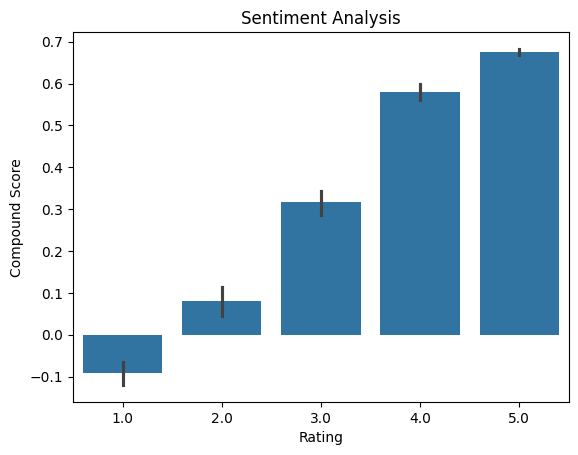

In [28]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Sentiment Analysis')
ax.set_xlabel('Rating')
ax.set_ylabel('Compound Score')

Text(0, 0.5, 'Polarity')

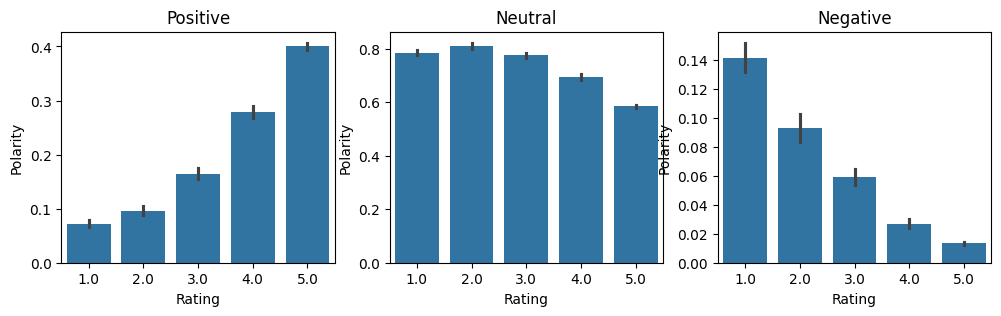

In [29]:
fig,axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Polarity')

axs[1].set_title('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Polarity')

axs[2].set_title('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Polarity')

# axs[1].set_title('Neutral')
# axs[1].set_label

# Roberta Pretrained Model

install relevant libraries

In [30]:
!pip install torch
!pip install tensorflow
!pip install flax

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [95]:
!pip install --upgrade tensorflow-intel
!pip install ml-dtypes==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.2/683.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.3/341.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.1/777.1 kB 9.2 MB/s eta 0:00:00


In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

initilize model

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [33]:
eg =  new_sample['text'][0:1:]

example = eg.iloc[0]
sid.polarity_scores(example)

{'neg': 0.0, 'neu': 0.356, 'pos': 0.644, 'compound': 0.9128}

In [34]:
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
print (scores_dict)

{'roberta_neg': 0.0017830145, 'roberta_neu': 0.016520333, 'roberta_pos': 0.98169667}


In [35]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer (example, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores [0],
        'roberta_neu' : scores [1],
        'roberta_pos' : scores [2]
    }
    return (scores_dict)

In [36]:
new_sample

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Id
1746467,5.0,Sexy,Really cute and attractive and fit perfect ord...,[],B071Z9F2XL,B071Z9F2XL,AEA5JYGGF6JDITNFQFOP4IX5PD2Q,1559389545852,0,True,1
1914537,5.0,How it fit,Thought they were leggings but I still like th...,[],B097BNVGF9,B097BMDMKB,AFTVWCNSEGCJ47WI5LQ74KTDFBVQ,1680285413056,0,True,2
371212,3.0,Runs Small,It was too small. I Ordered a size up and it ...,[],B07CVYV2D3,B07CVYV2D3,AFFPDHTJPDT7ZK5V46WDHJEHH7EQ,1563754552074,0,True,3
1762113,4.0,Comfy but a little short,Very comfy pant but a little short for my son.,[],B07Q58KZ66,B07Q58KZ66,AG7GPSDG747TL7ZDYP5CN6ZM2T2A,1582556487336,0,True,4
844125,5.0,GREAT LOOK AND GREAT BUY!!!!,"For the price, I was astounded by these earrin...",[],B01MSR7IQB,B01MSR7IQB,AFJYR62YXUOE72BZIU6TH2VNU6PA,1497280111336,0,True,5
...,...,...,...,...,...,...,...,...,...,...,...
783573,1.0,Very poor fit,This shirt did not fit at all. It was way too ...,[],B07ZHJFBT9,B07ZHJFBT9,AHKT4Z5HO2ZRKX3ABI5WEX3LEX7Q,1596241150702,1,True,9996
1423890,5.0,Love it,Easy to breath in,[],B08G48MLZ3,B08G48MLZ3,AHG5DJUSNRYETQ7N5JL7RLDDR45Q,1603455092005,0,True,9997
1260284,1.0,Horrible!!!,Terrible purchase! It literally came apart whe...,[],B01EY3QPFM,B01EY3QPFM,AHQ3MVOS26ZTEDP7YVD3QMAGXIYA,1488807589000,3,True,9998
21834,5.0,Moneys worth,This money belt is perfect for what I need and...,[],B0747KHKSM,B0747KHKSM,AEISTOIV5JQZGURRR7UGVLXCT2IQ,1536508107185,1,True,9999


In [37]:
res = {}
for i, row in tqdm(new_sample.iterrows(), total = len (new_sample)):
    try:
        text= row ['text']
        myid= row ['Id']
        vader_result= sid.polarity_scores(text)
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename [f"vader_{key}"]= value
        roberta_result = polarity_scores_roberta(text)
        both= {**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError :
        print(f'Broke for id {myid}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 2826


In [38]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.244,
 'vader_pos': 0.756,
 'vader_compound': 0.4754,
 'roberta_neg': 0.0066650813,
 'roberta_neu': 0.046571765,
 'roberta_pos': 0.9467631}

In [39]:
results_df= pd.DataFrame(res).T
results_df= results_df.reset_index().rename(columns ={'index':'Id'})
results_df=results_df.merge(new_sample, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,0.0,0.356,0.644,0.9128,0.001783,0.016520,0.981697,5.0,Sexy,Really cute and attractive and fit perfect ord...,[],B071Z9F2XL,B071Z9F2XL,AEA5JYGGF6JDITNFQFOP4IX5PD2Q,1559389545852,0,True
1,2,0.0,0.525,0.475,0.8458,0.003232,0.047137,0.949630,5.0,How it fit,Thought they were leggings but I still like th...,[],B097BNVGF9,B097BMDMKB,AFTVWCNSEGCJ47WI5LQ74KTDFBVQ,1680285413056,0,True
2,3,0.0,1.000,0.000,0.0000,0.501434,0.403382,0.095184,3.0,Runs Small,It was too small. I Ordered a size up and it ...,[],B07CVYV2D3,B07CVYV2D3,AFFPDHTJPDT7ZK5V46WDHJEHH7EQ,1563754552074,0,True
3,4,0.0,1.000,0.000,0.0000,0.004348,0.116765,0.878887,4.0,Comfy but a little short,Very comfy pant but a little short for my son.,[],B07Q58KZ66,B07Q58KZ66,AG7GPSDG747TL7ZDYP5CN6ZM2T2A,1582556487336,0,True
4,5,0.0,0.594,0.406,0.9061,0.001302,0.008000,0.990698,5.0,GREAT LOOK AND GREAT BUY!!!!,"For the price, I was astounded by these earrin...",[],B01MSR7IQB,B01MSR7IQB,AFJYR62YXUOE72BZIU6TH2VNU6PA,1497280111336,0,True


In [40]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating', 'title', 'text',
       'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase'],
      dtype='object')

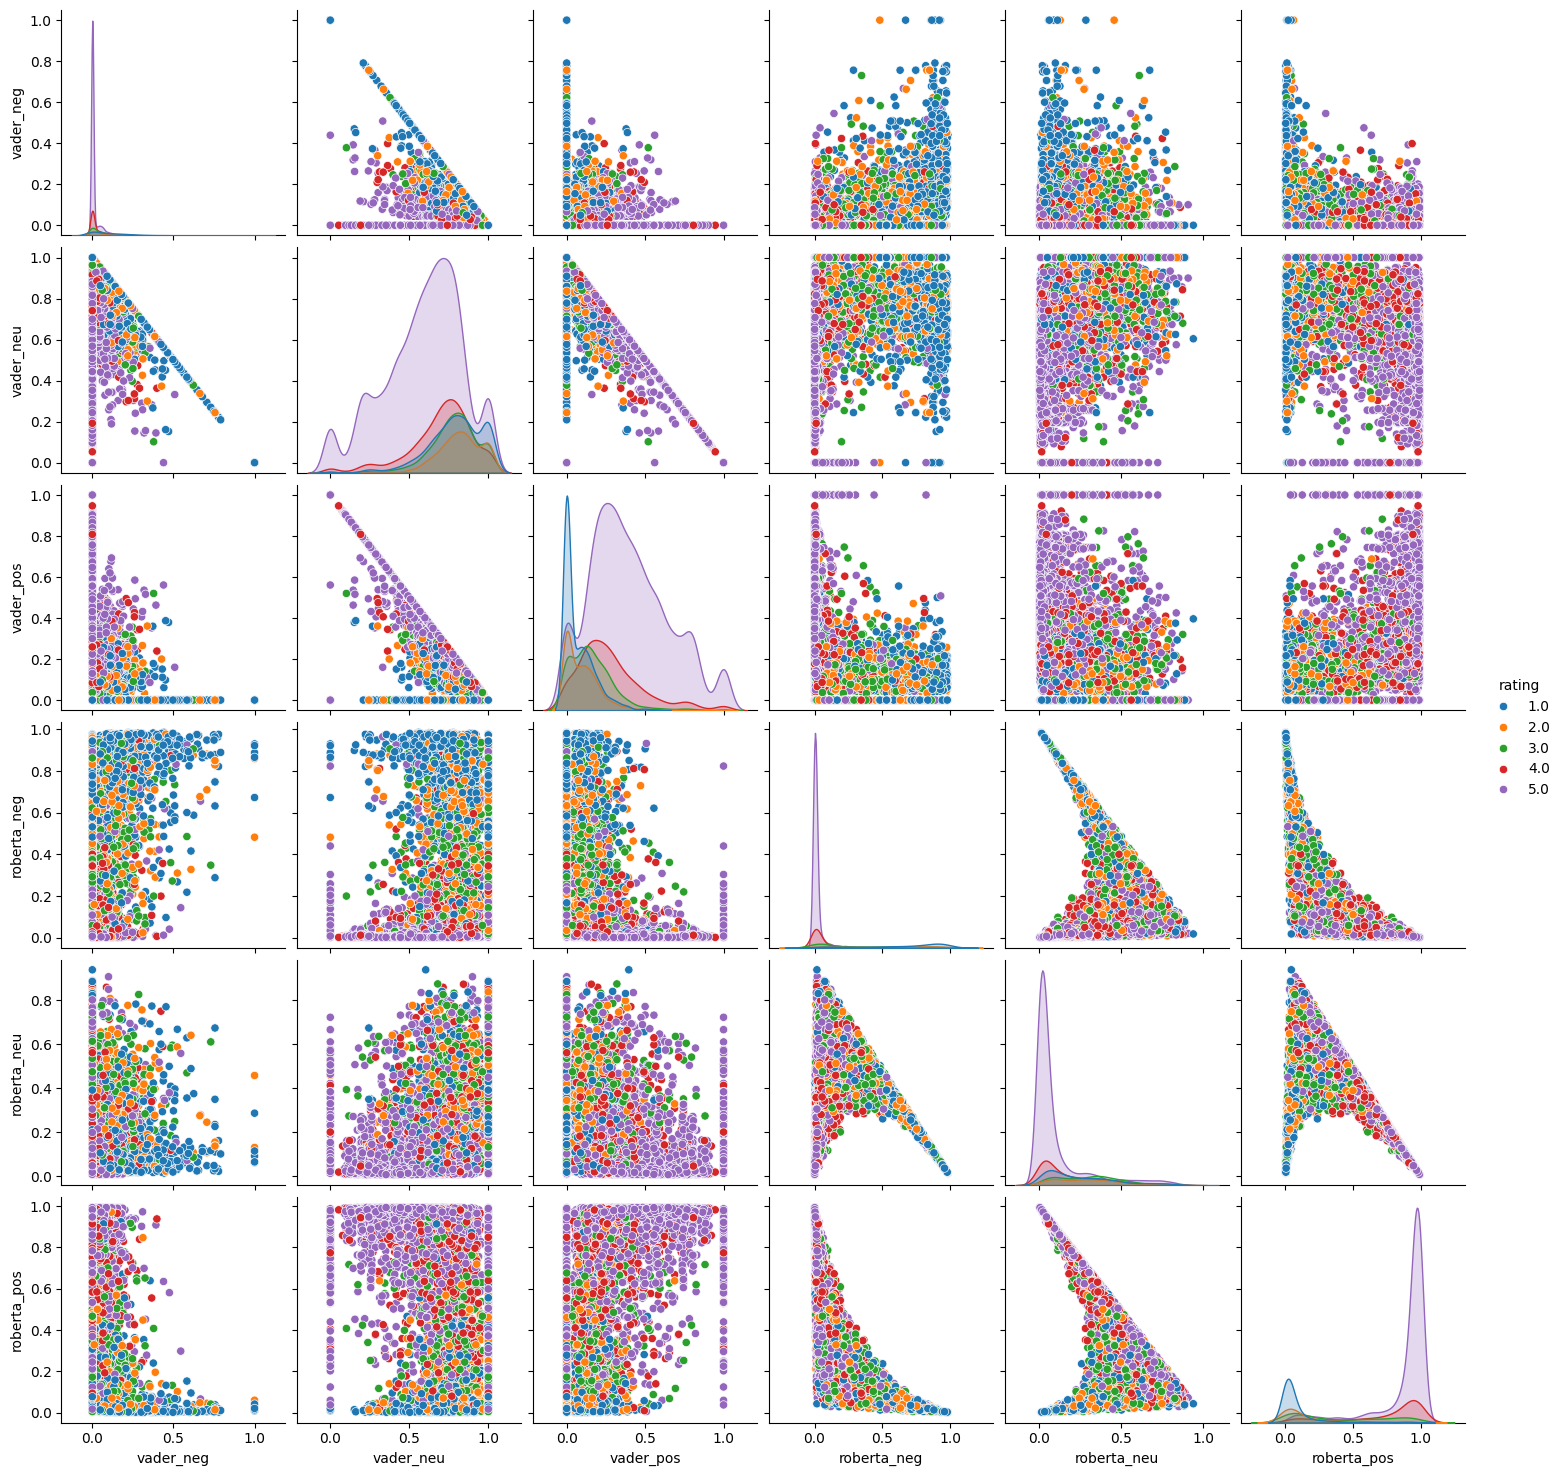

In [46]:
sns.pairplot (data = results_df, vars= ['vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
                    hue= 'rating', palette = 'tab10')
plt.show()

In [47]:
results_df.query('rating == 1').sort_values ('roberta_pos', ascending = False)['text'].values[0]
results_df.query('rating == 1').sort_values ('vader_pos', ascending = False)['text'].values[0]
results_df.query('rating == 5').sort_values ('roberta_neg', ascending = False)['text'].values[0]
results_df.query('rating == 5').sort_values ('vader_neg', ascending = False)['text'].values[0]

'Sleep dud.'

In [43]:
from transformers import pipeline
sent_pipeline = pipeline ("sentiment-analysis")
sent_pipeline ('I hate people pleasing' )
sent_pipeline ('I love dogs' )
sent_pipeline ('Subscribe to my channel' )

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9560473561286926}]